In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('./data/preprocessedData/preprocessedData.csv')
data.head()


,Unnamed: 0,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time,day-night,DAY
0,0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night,Fri
1,1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,Morning,Sat
2,2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night,Sat
3,3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening,Tues
4,4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon,Wed


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1135 entries, 0 to 1134
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1135 non-null   int64  
 1   START_DATE  1135 non-null   object 
 2   END_DATE    1135 non-null   object 
 3   CATEGORY    1135 non-null   object 
 4   START       1135 non-null   object 
 5   STOP        1135 non-null   object 
 6   MILES       1135 non-null   float64
 7   PURPOSE     1135 non-null   object 
 8   date        1135 non-null   object 
 9   time        1135 non-null   float64
 10  day-night   1135 non-null   object 
 11  DAY         1135 non-null   object 
dtypes: float64(2), int64(1), object(9)
memory usage: 106.5+ KB


In [4]:
data.shape

(1135, 12)

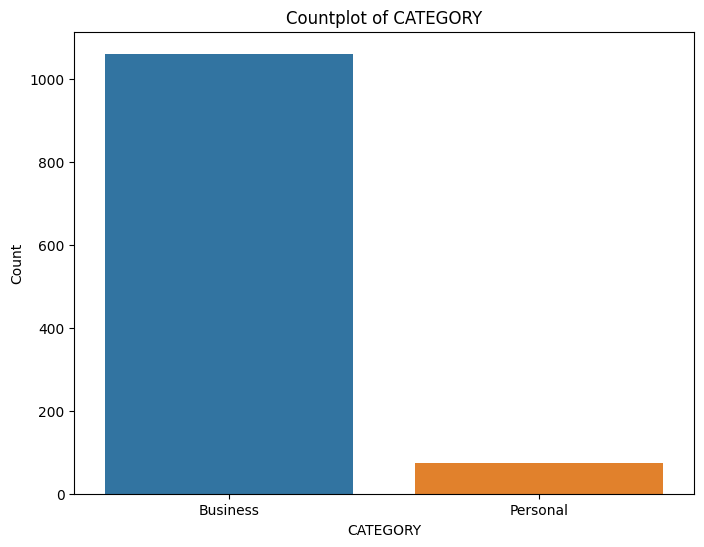

In [5]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='CATEGORY')
plt.title('Countplot of CATEGORY')
plt.xlabel('CATEGORY')
plt.ylabel('Count')
plt.show()

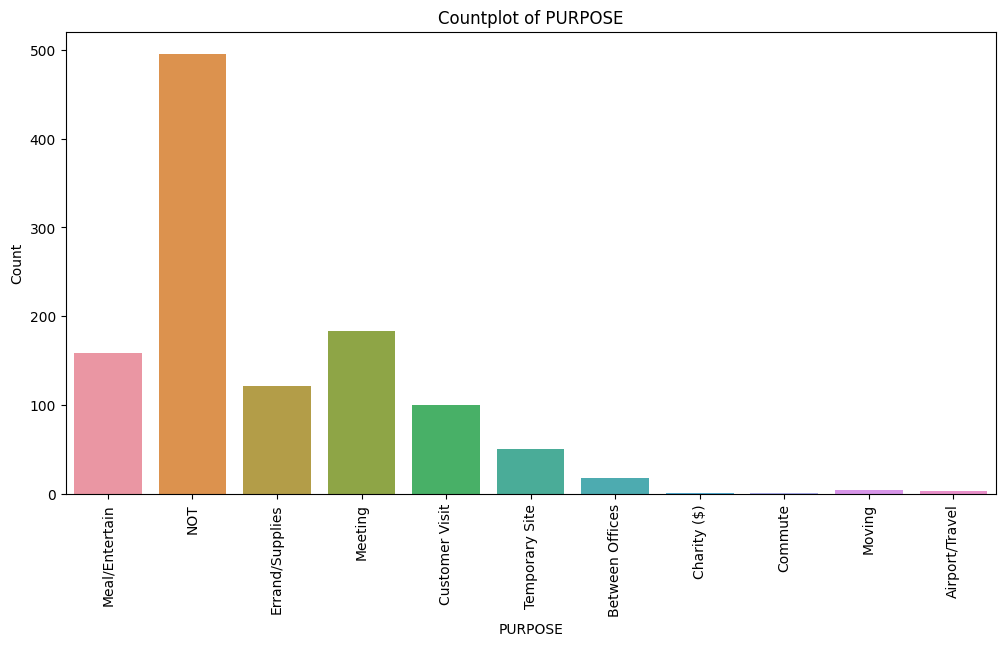

In [6]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='PURPOSE')
plt.title('Countplot of PURPOSE')
plt.xlabel('PURPOSE')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

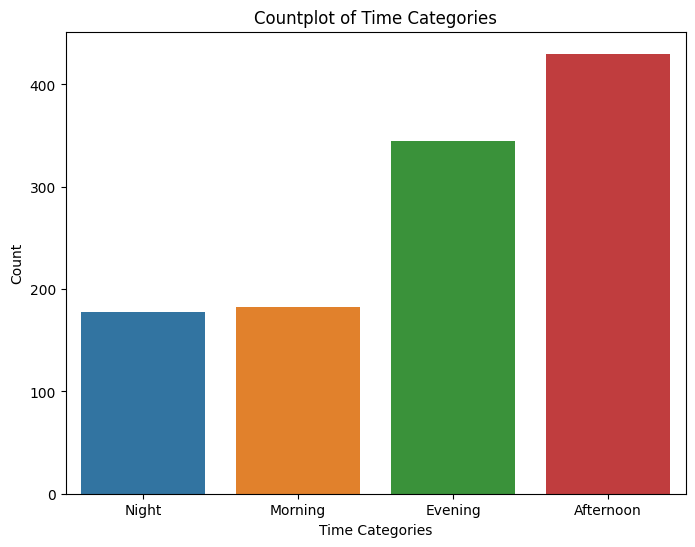

In [7]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='day-night')
plt.title('Countplot of Time Categories')
plt.xlabel('Time Categories')
plt.ylabel('Count')
plt.show()

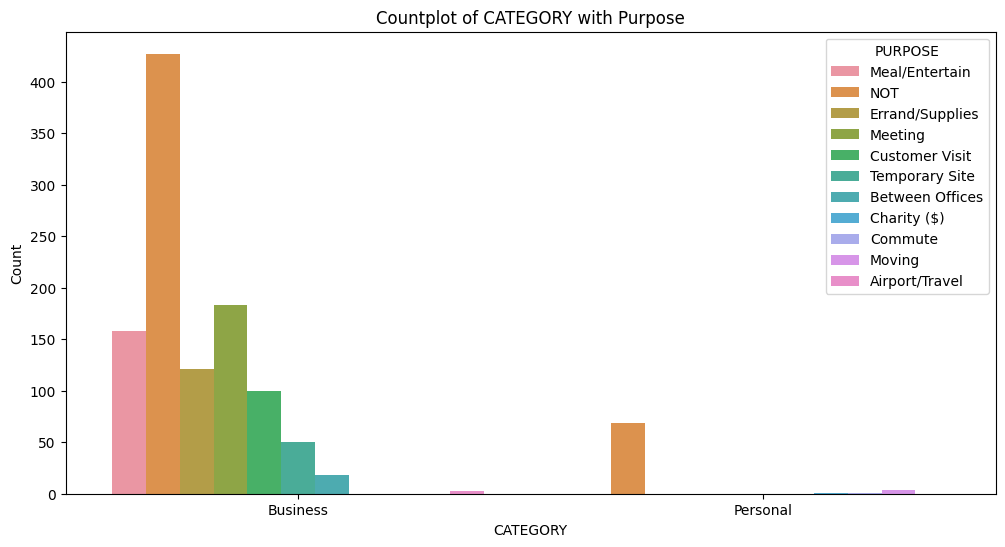

In [8]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='CATEGORY', hue='PURPOSE')
plt.title('Countplot of CATEGORY with Purpose')
plt.xlabel('CATEGORY')
plt.ylabel('Count')
plt.legend(title='PURPOSE', loc='upper right')
plt.show()

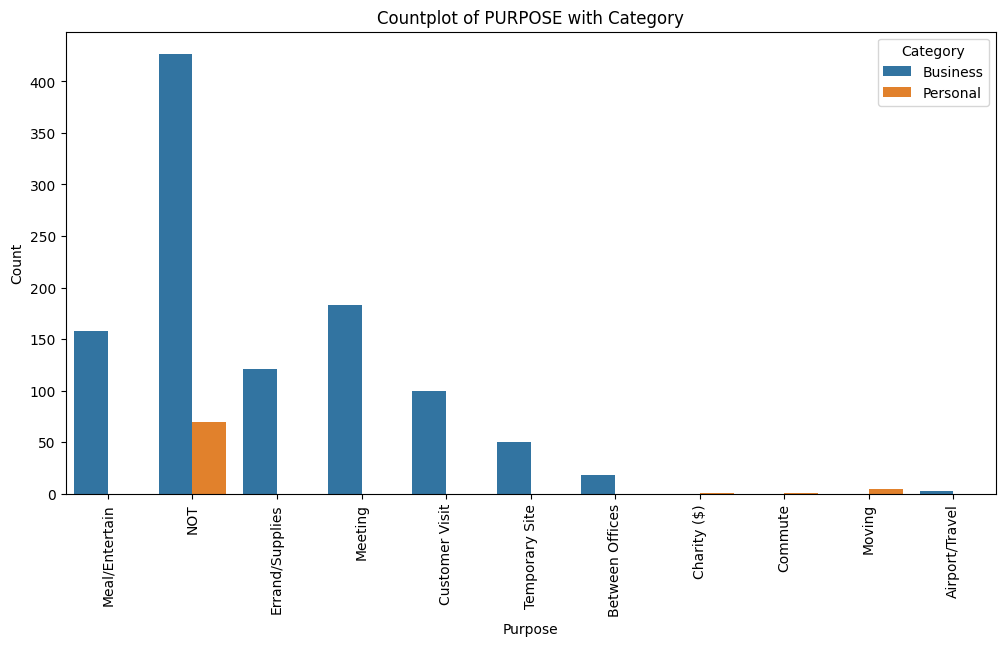

In [9]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='PURPOSE', hue='CATEGORY')
plt.title('Countplot of PURPOSE with Category')
plt.xlabel('Purpose')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Category', loc='upper right')
plt.show()

In [10]:
from sklearn.preprocessing import OneHotEncoder

object_cols = ['CATEGORY', 'PURPOSE']
OH_encoder = OneHotEncoder(sparse=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(data[object_cols]))
OH_cols.index = data.index
categories = OH_encoder.categories_
category_names = [f"{col}_{cat}" for col, cats in zip(object_cols, categories) for cat in cats]
OH_cols.columns = category_names
df_final = data.drop(object_cols, axis=1)
data = pd.concat([df_final, OH_cols], axis=1)

/home/jayanth/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [11]:
data.head()

,Unnamed: 0,START_DATE,END_DATE,START,STOP,MILES,date,time,day-night,DAY,...,PURPOSE_Between Offices,PURPOSE_Charity ($),PURPOSE_Commute,PURPOSE_Customer Visit,PURPOSE_Errand/Supplies,PURPOSE_Meal/Entertain,PURPOSE_Meeting,PURPOSE_Moving,PURPOSE_NOT,PURPOSE_Temporary Site
0,0,2016-01-01 21:11:00,2016-01-01 21:17:00,Fort Pierce,Fort Pierce,5.1,2016-01-01,21.0,Night,Fri,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,2016-01-02 01:25:00,2016-01-02 01:37:00,Fort Pierce,Fort Pierce,5.0,2016-01-02,1.0,Morning,Sat,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2,2016-01-02 20:25:00,2016-01-02 20:38:00,Fort Pierce,Fort Pierce,4.8,2016-01-02,20.0,Night,Sat,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,3,2016-01-05 17:31:00,2016-01-05 17:45:00,Fort Pierce,Fort Pierce,4.7,2016-01-05,17.0,Evening,Tues,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,4,2016-01-06 14:42:00,2016-01-06 15:49:00,Fort Pierce,West Palm Beach,63.7,2016-01-06,14.0,Afternoon,Wed,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


[Text(0.5, 0, 'MONTHS'), Text(0, 0.5, 'VALUE COUNT')]

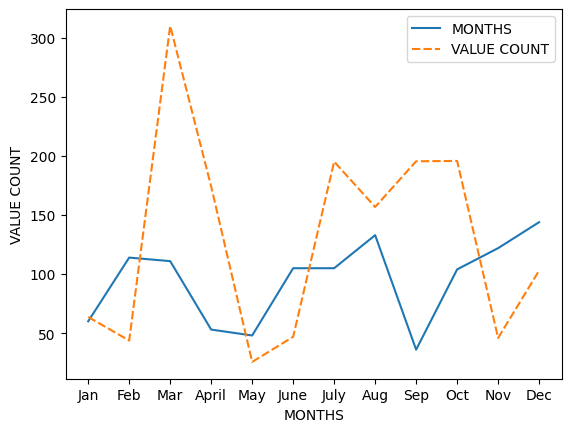

In [12]:
data['MONTH'] = pd.DatetimeIndex(data['START_DATE']).month
month_label = {1.0: 'Jan', 2.0: 'Feb', 3.0: 'Mar', 4.0: 'April',
			5.0: 'May', 6.0: 'June', 7.0: 'July', 8.0: 'Aug',
			9.0: 'Sep', 10.0: 'Oct', 11.0: 'Nov', 12.0: 'Dec'}
data["MONTH"] = data.MONTH.map(month_label)

mon = data.MONTH.value_counts(sort=False)

df = pd.DataFrame({"MONTHS": mon.values,
				"VALUE COUNT": data.groupby('MONTH',
												sort=False)['MILES'].max()})

p = sns.lineplot(data=df)
p.set(xlabel="MONTHS", ylabel="VALUE COUNT")

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

data['MONTH'] = pd.DatetimeIndex(data['START_DATE']).month
month_label = {1.0: 'Jan', 2.0: 'Feb', 3.0: 'Mar', 4.0: 'April',
               5.0: 'May', 6.0: 'June', 7.0: 'July', 8.0: 'Aug',
               9.0: 'Sep', 10.0: 'Oct', 11.0: 'Nov', 12.0: 'Dec'}
data["MONTH"] = data.MONTH.map(month_label)

total_rides_per_month = data['MONTH'].value_counts().sort_index()

max_miles_per_month = data.groupby('MONTH')['MILES'].max()
data.to_csv('./data/preprocessedData/preprocessedData.csv')

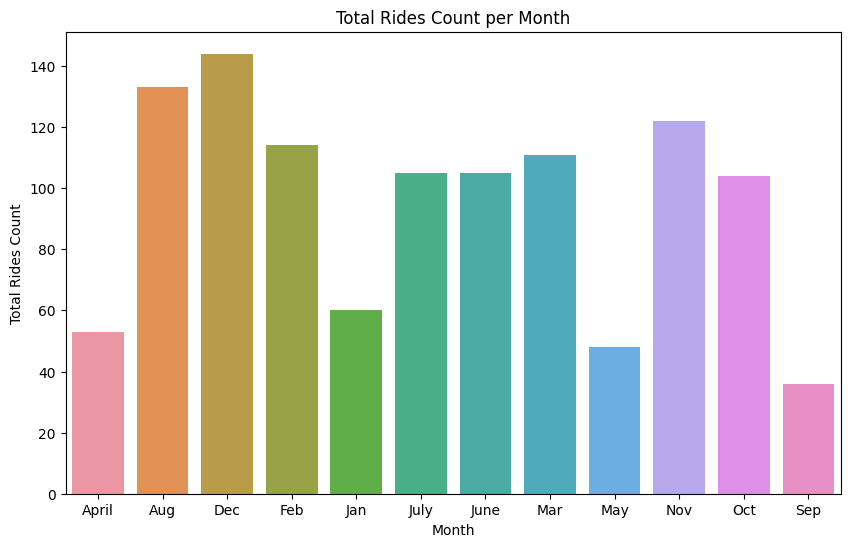

In [14]:
plt.figure(figsize=(10, 6))
sns.barplot(x=total_rides_per_month.index, y=total_rides_per_month.values)
plt.xlabel('Month')
plt.ylabel('Total Rides Count')
plt.title('Total Rides Count per Month')
plt.show()

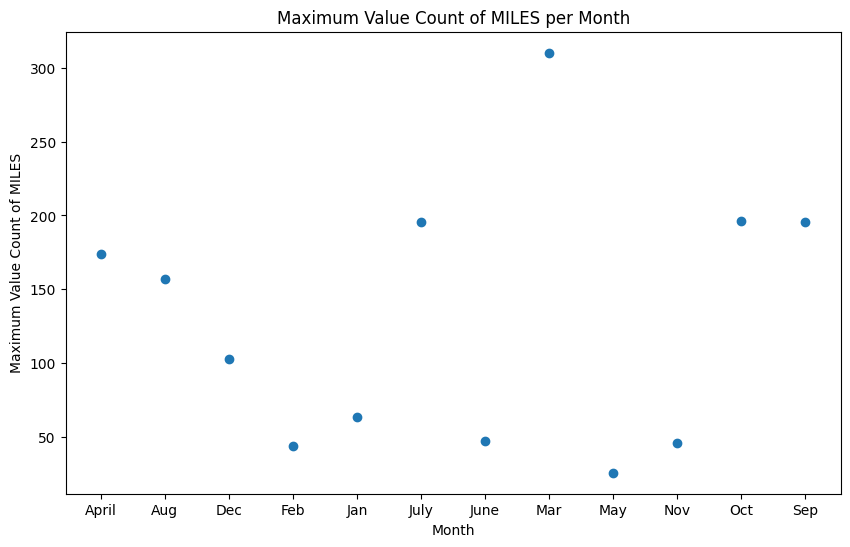

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(x=max_miles_per_month.index, y=max_miles_per_month.values)
plt.xlabel('Month')
plt.ylabel('Maximum Value Count of MILES')
plt.title('Maximum Value Count of MILES per Month')
plt.show()

Text(0, 0.5, 'COUNT')

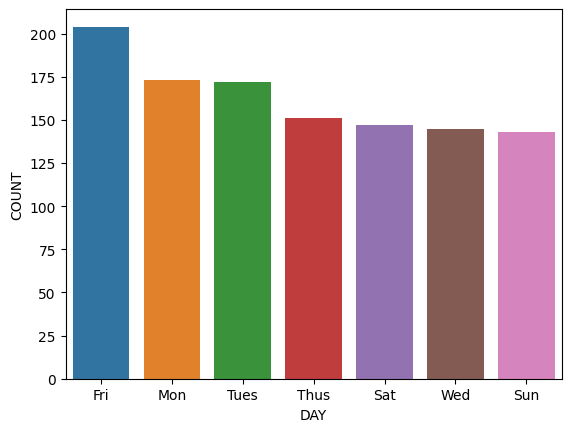

In [16]:
day_label = data.DAY.value_counts()
sns.barplot(x=day_label.index, y=day_label);
plt.xlabel('DAY')
plt.ylabel('COUNT')

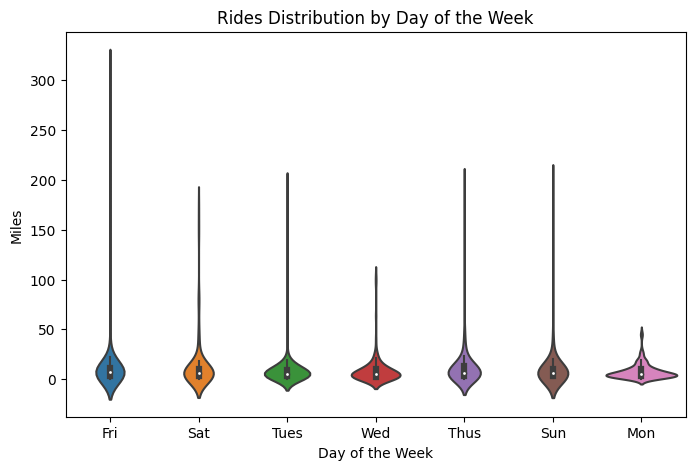

In [17]:
plt.figure(figsize=(8, 5))
sns.violinplot(x=data['DAY'], y=data['MILES'])
plt.xlabel('Day of the Week')
plt.ylabel('Miles')
plt.title('Rides Distribution by Day of the Week')
plt.show()

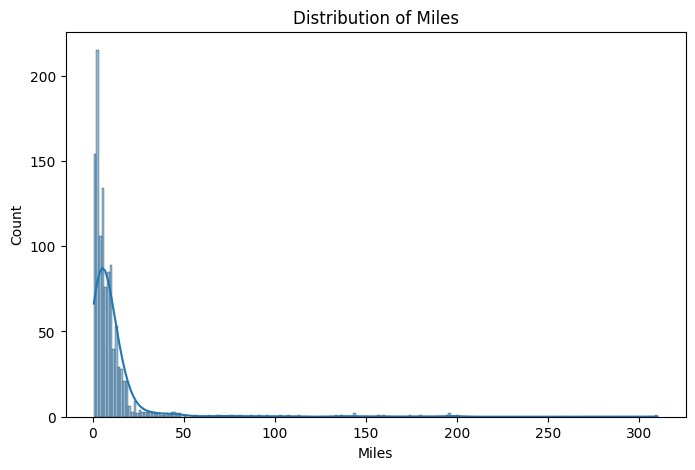

In [18]:
plt.figure(figsize=(8, 5))
sns.histplot(data['MILES'], kde=True)
plt.xlabel('Miles')
plt.ylabel('Count')
plt.title('Distribution of Miles')
plt.show()

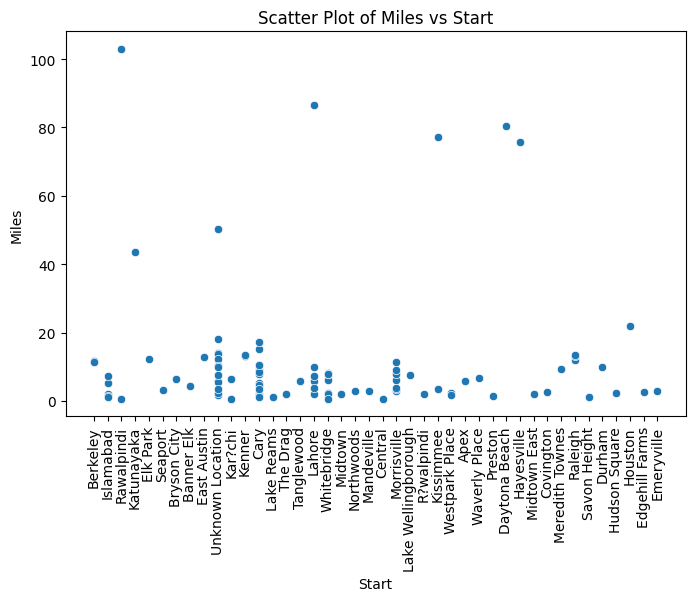

In [19]:
sampled_data = data.sample(n=100)
plt.figure(figsize=(8, 5))
sns.scatterplot(x=sampled_data['START'], y=sampled_data['MILES'])
plt.xlabel('Start')
plt.ylabel('Miles')
plt.title('Scatter Plot of Miles vs Start')
plt.xticks(rotation=90)
plt.show()

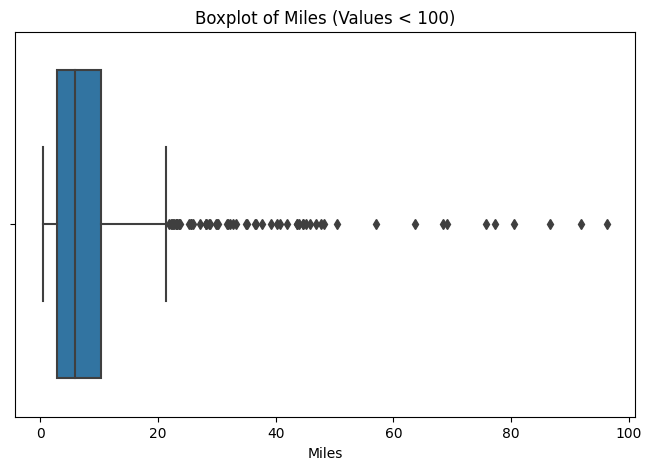

In [20]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=data[data['MILES'] < 100], x='MILES')
plt.xlabel('Miles')
plt.title('Boxplot of Miles (Values < 100)')
plt.show()

/tmp/ipykernel_15388/2487876003.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['MILES'] < 40]['MILES'])


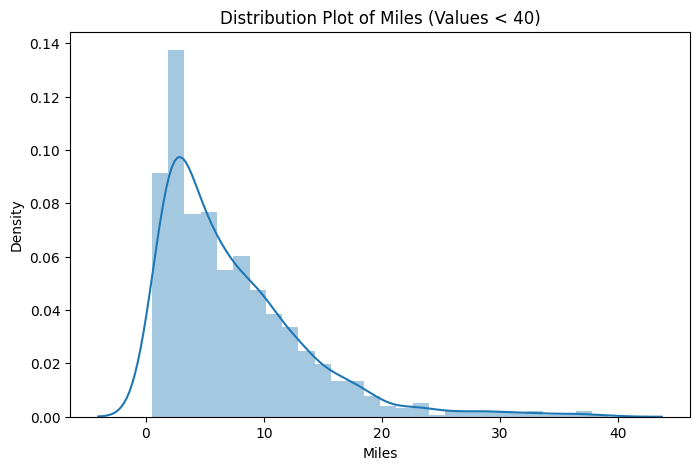

In [21]:
plt.figure(figsize=(8, 5))
sns.distplot(data[data['MILES'] < 40]['MILES'])
plt.xlabel('Miles')
plt.title('Distribution Plot of Miles (Values < 40)')
plt.show()